In [1]:
import sys
import os
import numpy as np
from copy import deepcopy

sys.path.insert(0, os.path.abspath('./src/'))

from pdb_numpy import Coor, Model, format, abinitio

In [2]:
from importlib import reload
abinitio = reload(abinitio)

In [9]:
test = abinitio.make_peptide('ACCCPPPPPPWWWCA', n_term='')

In [10]:
test

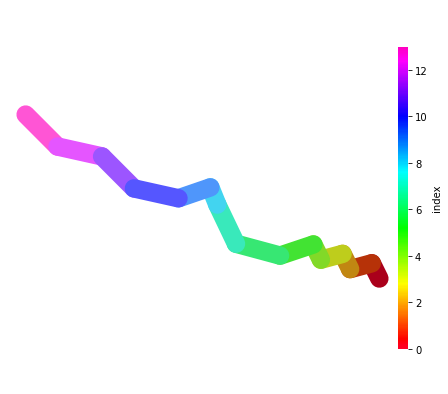

In [11]:
from pdb_numpy import visu

visu.plot_pseudo_3D(test)

In [12]:
view = visu.get_view(test)
view.add_licorice('all')
view

No cell information in mmCIF file


NGLWidget()

In [8]:
test.models[0].atom_dict["field"]

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A'], dtype='<U1')

In [2]:

test = Coor('/home/murail/Downloads/3ftk.pdb')
print(test.crystal_pack)

test.write("test.cif", overwrite=True)


CRYST1   20.630    4.700   21.009  90.00  92.28  90.00 P 1 21 1      2          



In [3]:
print(test.data_mmCIF)

{'title': {'title': 'untitled'}, '_entry': {'id': 'XXXX'}, '_cell': {'length_a': '20.63', 'length_b': '4.7', 'length_c': '21.009', 'angle_alpha': '90.0', 'angle_beta': '92.28', 'angle_gamma': '90.0', 'Z_PDB': '2'}, '_atom_site': None}


In [5]:
test = Coor('/home/murail/Downloads/3ftk.cif')
print(test.crystal_pack)

CRYST1   20.630    4.700   21.009  90.00  92.28  90.00 P 1 21 1    2



In [6]:
test.write("test.cif", overwrite=True)

In [4]:
print(test.transformation)

{1: {'chains': ['A', 'B'], 'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0], [2.0, 1.0, 0.0, 0.0, 0.0], [2.0, 0.0, 1.0, 0.0, 4.7], [2.0, 0.0, 0.0, 1.0, 0.0], [3.0, 1.0, 0.0, 0.0, 0.0], [3.0, 0.0, 1.0, 0.0, -4.7], [3.0, 0.0, 0.0, 1.0, 0.0]]}, 2: {'chains': ['A', 'B'], 'matrix': [[4.0, -1.0, 0.0, 0.0, 0.0], [4.0, 0.0, 1.0, 0.0, 2.35], [4.0, 0.0, 0.0, -1.0, 0.0], [5.0, -1.0, 0.0, 0.0, 0.0], [5.0, 0.0, 1.0, 0.0, 7.05], [5.0, 0.0, 0.0, -1.0, 0.0], [6.0, -1.0, 0.0, 0.0, 0.0], [6.0, 0.0, 1.0, 0.0, -2.35], [6.0, 0.0, 0.0, -1.0, 0.0]]}, 3: {'chains': ['A', 'B'], 'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0]]}}


In [5]:
test.apply_transformation([1,2,3])
test.write('tmp_trans3.pdb')

In [128]:
def pdb_parse_transformation(text):
    """Parse the `REMARK 350   BIOMT` information from a pdb file.

    Parameters
    ----------
    text : str
        pdb file

    Returns
    -------
    symetry_dict : dict
        symetry information
    """

    transformation_dict = {}

    for line in text.split("\n"):
        if line[11:23] == "BIOMOLECULE:":
            biomol = int(line[24:])
            transformation_dict[biomol] = {"chains": [], "matrix": []}
        elif line[34:41] == "CHAINS:":
            transformation_dict[biomol]["chains"] += line[42:].split()
        elif line.startswith("REMARK 350   BIOMT"):
            transformation_dict[biomol]["matrix"] += [
                [float(x) for x in line[19:].split()]
            ]

    return transformation_dict

txt = """REMARK 350                                                                      
REMARK 350 COORDINATES FOR A COMPLETE MULTIMER REPRESENTING THE KNOWN           
REMARK 350 BIOLOGICALLY SIGNIFICANT OLIGOMERIZATION STATE OF THE                
REMARK 350 MOLECULE CAN BE GENERATED BY APPLYING BIOMT TRANSFORMATIONS          
REMARK 350 GIVEN BELOW.  BOTH NON-CRYSTALLOGRAPHIC AND                          
REMARK 350 CRYSTALLOGRAPHIC OPERATIONS ARE GIVEN.                               
REMARK 350                                                                      
REMARK 350 BIOMOLECULE: 1                                                       
REMARK 350 AUTHOR DETERMINED BIOLOGICAL UNIT: DIMERIC                           
REMARK 350 APPLY THE FOLLOWING TO CHAINS: A                                     
REMARK 350   BIOMT1   1  1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   1  0.000000  1.000000  0.000000        0.00000            
REMARK 350   BIOMT3   1  0.000000  0.000000  1.000000        0.00000            
REMARK 350   BIOMT1   2  1.000000  0.000000  0.000000        0.94015            
REMARK 350   BIOMT2   2  0.000000  1.000000  0.000000        4.78756            
REMARK 350   BIOMT3   2  0.000000  0.000000  1.000000        0.00000"""

txt2 = """REMARK 350                                                                      
REMARK 350 COORDINATES FOR A COMPLETE MULTIMER REPRESENTING THE KNOWN           
REMARK 350 BIOLOGICALLY SIGNIFICANT OLIGOMERIZATION STATE OF THE                
REMARK 350 MOLECULE CAN BE GENERATED BY APPLYING BIOMT TRANSFORMATIONS          
REMARK 350 GIVEN BELOW.  BOTH NON-CRYSTALLOGRAPHIC AND                          
REMARK 350 CRYSTALLOGRAPHIC OPERATIONS ARE GIVEN.                               
REMARK 350                                                                      
REMARK 350 BIOMOLECULE: 1                                                       
REMARK 350 AUTHOR DETERMINED BIOLOGICAL UNIT: TRIMERIC                          
REMARK 350 APPLY THE FOLLOWING TO CHAINS: A                                     
REMARK 350   BIOMT1   1  1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   1  0.000000  1.000000  0.000000        0.00000            
REMARK 350   BIOMT3   1  0.000000  0.000000  1.000000        0.00000            
REMARK 350   BIOMT1   2  1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   2  0.000000  1.000000  0.000000        4.70000            
REMARK 350   BIOMT3   2  0.000000  0.000000  1.000000        0.00000            
REMARK 350   BIOMT1   3  1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   3  0.000000  1.000000  0.000000       -4.70000            
REMARK 350   BIOMT3   3  0.000000  0.000000  1.000000        0.00000            
REMARK 350                                                                      
REMARK 350 BIOMOLECULE: 2                                                       
REMARK 350 AUTHOR DETERMINED BIOLOGICAL UNIT: TRIMERIC                          
REMARK 350 APPLY THE FOLLOWING TO CHAINS: A                                     
REMARK 350   BIOMT1   1 -1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   1  0.000000  1.000000  0.000000        2.35000            
REMARK 350   BIOMT3   1  0.000000  0.000000 -1.000000        0.00000            
REMARK 350   BIOMT1   2 -1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   2  0.000000  1.000000  0.000000        7.05000            
REMARK 350   BIOMT3   2  0.000000  0.000000 -1.000000        0.00000            
REMARK 350   BIOMT1   3 -1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   3  0.000000  1.000000  0.000000       -2.35000            
REMARK 350   BIOMT3   3  0.000000  0.000000 -1.000000        0.00000            
REMARK 350                                                                      
REMARK 350 BIOMOLECULE: 3                                                       
REMARK 350 SOFTWARE DETERMINED QUATERNARY STRUCTURE: MONOMERIC                  
REMARK 350 SOFTWARE USED: PISA                                                  
REMARK 350 APPLY THE FOLLOWING TO CHAINS: A                                     
REMARK 350   BIOMT1   1  1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   1  0.000000  1.000000  0.000000        0.00000            
REMARK 350   BIOMT3   1  0.000000  0.000000  1.000000        0.00000"""


#print(pdb_parse_transformation(txt))
pdb_parse_transformation(txt2)
#print()
#print(pdb_parse_transformation(txt2))

{1: {'chains': ['A'],
  'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0],
   [1.0, 0.0, 1.0, 0.0, 0.0],
   [1.0, 0.0, 0.0, 1.0, 0.0],
   [2.0, 1.0, 0.0, 0.0, 0.0],
   [2.0, 0.0, 1.0, 0.0, 4.7],
   [2.0, 0.0, 0.0, 1.0, 0.0],
   [3.0, 1.0, 0.0, 0.0, 0.0],
   [3.0, 0.0, 1.0, 0.0, -4.7],
   [3.0, 0.0, 0.0, 1.0, 0.0]]},
 2: {'chains': ['A'],
  'matrix': [[1.0, -1.0, 0.0, 0.0, 0.0],
   [1.0, 0.0, 1.0, 0.0, 2.35],
   [1.0, 0.0, 0.0, -1.0, 0.0],
   [2.0, -1.0, 0.0, 0.0, 0.0],
   [2.0, 0.0, 1.0, 0.0, 7.05],
   [2.0, 0.0, 0.0, -1.0, 0.0],
   [3.0, -1.0, 0.0, 0.0, 0.0],
   [3.0, 0.0, 1.0, 0.0, -2.35],
   [3.0, 0.0, 0.0, -1.0, 0.0]]},
 3: {'chains': ['A'],
  'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0],
   [1.0, 0.0, 1.0, 0.0, 0.0],
   [1.0, 0.0, 0.0, 1.0, 0.0]]}}

In [143]:

def parse_transformation(data_mmCIF):
    """Parse the `_pdbx_struct_oper_list` information from a mmcif file.

    Parameters
    ----------
    pdbx_struct_oper_list : dict
        mmcif file information

    Returns
    -------
    symetry_dict : dict
        symetry information
    """
    
    matrix_indexes = [
        ['id', 'matrix[1][1]', 'matrix[1][2]', 'matrix[1][3]', 'vector[1]'],
        ['id', 'matrix[2][1]', 'matrix[2][2]', 'matrix[2][3]', 'vector[2]'],
        ['id', 'matrix[3][1]', 'matrix[3][2]', 'matrix[3][3]', 'vector[3]']
    ]
    transformation_dict = {}
    print('_pdbx_struct_assembly_gen', data_mmCIF['_pdbx_struct_assembly_gen'])
    print('_pdbx_struct_oper_list', data_mmCIF['_pdbx_struct_oper_list'])


    # Extract transformation list:
    # Here with only one transformation
    if 'asym_id_list' in data_mmCIF['_pdbx_struct_assembly_gen']:
        trans_num = 1
        chain_list = [
            chain.strip() for chain in data_mmCIF['_pdbx_struct_assembly_gen']['asym_id_list'].split(',')
        ]
        
        transformation_dict[1] = {"chains": chain_list, "matrix": []}

        for i in range(len(data_mmCIF['_pdbx_struct_oper_list']['value'][0])):
            
            for matrix_index in matrix_indexes:
                local_matrix = []
                for index in matrix_index:
                    local_index = data_mmCIF['_pdbx_struct_oper_list']['col_names'].index(index)
                    local_matrix.append(float(data_mmCIF['_pdbx_struct_oper_list']['value'][local_index][i]))
                transformation_dict[1]["matrix"].append(local_matrix)
        
    # Here with multiple transformation
    else:
        trans_num = len(data_mmCIF['_pdbx_struct_assembly']['value'][0])
        assert trans_num == len(data_mmCIF['_pdbx_struct_assembly_gen']['value'][0])
        
        chain_index = data_mmCIF['_pdbx_struct_assembly_gen']['col_names'].index('asym_id_list')
        local_matrix_index = data_mmCIF['_pdbx_struct_assembly_gen']['col_names'].index('oper_expression')
        
        for i in range(trans_num):
            # Extract chain list and matrix indexes
            chain_list = [
                chain.strip() for chain in data_mmCIF['_pdbx_struct_assembly_gen']['value'][chain_index][i].split(',')
            ]
            matrix_index_list = [
                chain.strip() for chain in data_mmCIF['_pdbx_struct_assembly_gen']['value'][local_matrix_index][i].split(',')
            ]
            transformation_dict[i+1] = {"chains": chain_list, "matrix": []}

            # Extract matrix value
            for j in range(len(data_mmCIF['_pdbx_struct_oper_list']['value'][0])):
                matrix_id = data_mmCIF['_pdbx_struct_oper_list']['value'][0][j]
                
                if matrix_id in matrix_index_list:
                    for matrix_index in matrix_indexes:
                        local_matrix = []
                        for index in matrix_index:
                            local_index = data_mmCIF['_pdbx_struct_oper_list']['col_names'].index(index)
                            local_matrix.append(float(data_mmCIF['_pdbx_struct_oper_list']['value'][local_index][j]))
                        transformation_dict[i+1]["matrix"].append(local_matrix)
        
    return transformation_dict


In [144]:
parse_transformation(test2.data_mmCIF)

_pdbx_struct_assembly_gen {'col_names': ['assembly_id', 'oper_expression', 'asym_id_list'], 'value': [['1', '2', '3'], ['1,2,3', '4,5,6', '1'], ['A,B', 'A,B', 'A,B']]}
_pdbx_struct_oper_list {'col_names': ['id', 'type', 'name', 'symmetry_operation', 'matrix[1][1]', 'matrix[1][2]', 'matrix[1][3]', 'vector[1]', 'matrix[2][1]', 'matrix[2][2]', 'matrix[2][3]', 'vector[2]', 'matrix[3][1]', 'matrix[3][2]', 'matrix[3][3]', 'vector[3]'], 'value': [['1', '2', '3', '4', '5', '6'], ["'identity operation'", "'crystal symmetry operation'", "'crystal symmetry operation'", "'crystal symmetry operation'", "'crystal symmetry operation'", "'crystal symmetry operation'"], ['1_555', '1_565', '1_545', '2_555', '2_565', '2_545'], ['x,y,z', 'x,y+1,z', 'x,y-1,z', '-x,y+1/2,-z', '-x,y+3/2,-z', '-x,y-1/2,-z'], ['1.0000000000', '1.0000000000', '1.0000000000', '-1.0000000000', '-1.0000000000', '-1.0000000000'], ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000'], ['0.0

{1: {'chains': ['A', 'B'],
  'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0],
   [1.0, 0.0, 1.0, 0.0, 0.0],
   [1.0, 0.0, 0.0, 1.0, 0.0],
   [2.0, 1.0, 0.0, 0.0, 0.0],
   [2.0, 0.0, 1.0, 0.0, 4.7],
   [2.0, 0.0, 0.0, 1.0, 0.0],
   [3.0, 1.0, 0.0, 0.0, 0.0],
   [3.0, 0.0, 1.0, 0.0, -4.7],
   [3.0, 0.0, 0.0, 1.0, 0.0]]},
 2: {'chains': ['A', 'B'],
  'matrix': [[4.0, -1.0, 0.0, 0.0, 0.0],
   [4.0, 0.0, 1.0, 0.0, 2.35],
   [4.0, 0.0, 0.0, -1.0, 0.0],
   [5.0, -1.0, 0.0, 0.0, 0.0],
   [5.0, 0.0, 1.0, 0.0, 7.05],
   [5.0, 0.0, 0.0, -1.0, 0.0],
   [6.0, -1.0, 0.0, 0.0, 0.0],
   [6.0, 0.0, 1.0, 0.0, -2.35],
   [6.0, 0.0, 0.0, -1.0, 0.0]]},
 3: {'chains': ['A', 'B'],
  'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0],
   [1.0, 0.0, 1.0, 0.0, 0.0],
   [1.0, 0.0, 0.0, 1.0, 0.0]]}}

In [145]:
parse_transformation(test.data_mmCIF)

_pdbx_struct_assembly_gen OrderedDict([('assembly_id', '1'), ('oper_expression', '1,2'), ('asym_id_list', 'A,B')])
_pdbx_struct_oper_list {'col_names': ['id', 'type', 'name', 'symmetry_operation', 'matrix[1][1]', 'matrix[1][2]', 'matrix[1][3]', 'vector[1]', 'matrix[2][1]', 'matrix[2][2]', 'matrix[2][3]', 'vector[2]', 'matrix[3][1]', 'matrix[3][2]', 'matrix[3][3]', 'vector[3]'], 'value': [['1', '2'], ["'identity operation'", "'crystal symmetry operation'"], ['1_555', '1_565'], ['x,y,z', 'x,y+1,z'], ['1.0000000000', '1.0000000000'], ['0.0000000000', '0.0000000000'], ['0.0000000000', '0.0000000000'], ['0.0000000000', '0.9401502764'], ['0.0000000000', '0.0000000000'], ['1.0000000000', '1.0000000000'], ['0.0000000000', '0.0000000000'], ['0.0000000000', '4.7875628934'], ['0.0000000000', '0.0000000000'], ['0.0000000000', '0.0000000000'], ['1.0000000000', '1.0000000000'], ['0.0000000000', '0.0000000000']]}


{1: {'chains': ['A', 'B'],
  'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0],
   [1.0, 0.0, 1.0, 0.0, 0.0],
   [1.0, 0.0, 0.0, 1.0, 0.0],
   [2.0, 1.0, 0.0, 0.0, 0.9401502764],
   [2.0, 0.0, 1.0, 0.0, 4.7875628934],
   [2.0, 0.0, 0.0, 1.0, 0.0]]}}

In [ ]:

assert test.len == 56
# Here there is only identity matrix
# as symmetry, so no change is expected
test.add_symmetry()
assert test.len == 56
test.apply_transformation()
assert test.len == 112
test.copy_box(3, 3, 3)
assert test.len == 3024
test.compute_chains_CA()
test.remove_overlap_chain()
assert test.len == 3024

test.write("test.pdb", check_file_out=False)


In [3]:
test.write('tmp.pdb', check_file_out=False)

In [4]:
test_2 = Coor('tmp.pdb')
test_2.write('tmp2.gro', check_file_out=False)

In [4]:
test.add_symmetry()
test.apply_transformation(index=1)
test.compute_chains_CA()
test.write_pdb('tmp.pdb', check_file_out=False)

Add symmetry 1
0
1
Add transformation 1
2
Add transformation 2


In [5]:
test.symmetry

{'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0],
  [1.0, 0.0, 1.0, 0.0, 0.0],
  [1.0, 0.0, 0.0, 1.0, 0.0],
  [2.0, -1.0, 0.0, 0.0, 0.0],
  [2.0, 0.0, 1.0, 0.0, 2.35],
  [2.0, 0.0, 0.0, -1.0, 0.0]]}

In [8]:
test.models

In [6]:
print(test.transformation)

{1: {'chains': ['A'], 'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0], [2.0, 1.0, 0.0, 0.0, 0.0], [2.0, 0.0, 1.0, 0.0, 4.7], [2.0, 0.0, 0.0, 1.0, 0.0], [3.0, 1.0, 0.0, 0.0, 0.0], [3.0, 0.0, 1.0, 0.0, -4.7], [3.0, 0.0, 0.0, 1.0, 0.0]]}, 2: {'chains': ['A'], 'matrix': [[1.0, -1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 2.35], [1.0, 0.0, 0.0, -1.0, 0.0], [2.0, -1.0, 0.0, 0.0, 0.0], [2.0, 0.0, 1.0, 0.0, 7.05], [2.0, 0.0, 0.0, -1.0, 0.0], [3.0, -1.0, 0.0, 0.0, 0.0], [3.0, 0.0, 1.0, 0.0, -2.35], [3.0, 0.0, 0.0, -1.0, 0.0]]}, 3: {'chains': ['A'], 'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0]]}}


In [22]:
def parse_transformation(text):

    transformation_dict = {}

    for line in text.split('\n'):
        if line[11:23] == "BIOMOLECULE:":
            biomol = int(line[24:])
            transformation_dict[biomol] = {'chains': [], 'matrix': []}
        elif line[34:41] == "CHAINS:":
            transformation_dict[biomol]['chains'] += line[42:].split()
        elif line.startswith('REMARK 350   BIOMT'):
            transformation_dict[biomol]['matrix'] += [[float(x) for x in line[19:].split()]]
        #print(line, line[34:])
    print(transformation_dict)


parse_transformation(test.transformation)

{1: {'chains': ['A'], 'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0], [2.0, 1.0, 0.0, 0.0, 0.0], [2.0, 0.0, 1.0, 0.0, 4.7], [2.0, 0.0, 0.0, 1.0, 0.0], [3.0, 1.0, 0.0, 0.0, 0.0], [3.0, 0.0, 1.0, 0.0, -4.7], [3.0, 0.0, 0.0, 1.0, 0.0]]}, 2: {'chains': ['A'], 'matrix': [[1.0, -1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 2.35], [1.0, 0.0, 0.0, -1.0, 0.0], [2.0, -1.0, 0.0, 0.0, 0.0], [2.0, 0.0, 1.0, 0.0, 7.05], [2.0, 0.0, 0.0, -1.0, 0.0], [3.0, -1.0, 0.0, 0.0, 0.0], [3.0, 0.0, 1.0, 0.0, -2.35], [3.0, 0.0, 0.0, -1.0, 0.0]]}, 3: {'chains': ['A'], 'matrix': [[1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0]]}}


In [34]:
test.models.append(deepcopy(test.models[0]))
test.models.append(deepcopy(test.models[0]))

In [4]:
text = \
"""REMARK 350   BIOMT1   2 -1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   2  0.000000  1.000000  0.000000        7.05000            
REMARK 350   BIOMT3   2  0.000000  0.000000 -1.000000        0.00000"""

rot_mat = []

for line in text.split("\n"):
    rot_mat.append([float(x) for x in line.split()[4:]])

rot_mat = np.array(rot_mat, dtype=object)
print(rot_mat)

text = \
"""REMARK 350   BIOMT1   3 -1.000000  0.000000  0.000000        0.00000            
REMARK 350   BIOMT2   3  0.000000  1.000000  0.000000       -2.35000            
REMARK 350   BIOMT3   3  0.000000  0.000000 -1.000000        0.00000"""

rot_mat_2 = []

for line in text.split("\n"):
    rot_mat_2.append([float(x) for x in line.split()[4:]])

rot_mat_2 = np.array(rot_mat_2, dtype=object)
print(rot_mat_2)

[[-1.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 7.05]
 [0.0 0.0 -1.0 0.0]]
[[-1.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 -2.35]
 [0.0 0.0 -1.0 0.0]]


In [21]:
rot_mat[:,:3]

array([[-1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0],
       [0.0, 0.0, -1.0]], dtype=object)

In [36]:
test.models[1].xyz = np.dot(test.models[0].xyz, rot_mat[:,:3]) + rot_mat[:,3]
test.models[2].xyz = np.dot(test.models[0].xyz, rot_mat_2[:,:3]) + rot_mat_2[:,3]

In [37]:
test.merge_model()
test.write_pdb('tmp.pdb', check_file_out=False)

In [25]:
pwd

'/home/murail/Documents/Code/pdb_numpy'